# Testing out GeoModel 

Get the data

In [1]:
from mesa_geo import GeoSpace, GeoAgent, AgentCreator
from mesa import Model 
import requests 

data = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json'
r = requests.get(data)
geojson_states = r.json()


Make the model happen 

Arizona


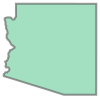

In [7]:

class State(GeoAgent):
    def __init__(self, unique_id, model, shape):
        super().__init__(unique_id, model, shape)

class GeoModel(Model):
    def __init__(self):
        self.grid = GeoSpace()

        state_agent_kwargs = dict(model=self)
        AC = AgentCreator(agent_class=State, agent_kwargs=state_agent_kwargs, crs="epsg:4326")
        agents = AC.from_GeoJSON(GeoJSON=geojson_states, unique_id='NAME')
        self.grid.add_agents(agents)

## then visualize
m = GeoModel()

agent = m.grid.agents[0]
print(agent.unique_id)
agent.shape

In [8]:
agent.CENSUSAREA

113594.084

In [9]:
neighbors = m.grid.get_neighbors(agent)
print([a.unique_id for a in neighbors])

['California', 'Colorado', 'Utah', 'Nevada', 'New Mexico']


/Users/majdal/.local/share/virtualenvs/thesis-PKkYFUSX/lib/python3.6/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 7, 20, 26.
  warnings.warn(message)


In [5]:
[a.unique_id for a in m.grid.get_neighbors_within_distance(agent, 600000)]

['California',
 'Nevada',
 'Arizona',
 'Utah',
 'Wyoming',
 'New Mexico',
 'Colorado',
 'Texas']